In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


「地震による被害の多い国 Top10 の可視化」

はじめに

日本は「地震大国」と呼ばれ、世界の中でも地震による影響を大きく受けてきた国である。
しかし、世界全体で見たとき、日本はどれほど地震被害を受けている国なのだろうか。
この疑問から、EM-DAT（国際災害データベース）のデータを用いて、
「地震による死者数が多い国トップ10を調べ、国ごとの差を可視化すること」を本分析の目的とした。
また、他国と比較することで、日本の防災力や災害リスクの特徴について理解を深めたいと考えた。
データについて

本分析で使用するデータは、EM-DAT（Emergency Events Database）より提供される
災害データセットである。主に以下の情報が含まれている。

災害の種類（Earthquake, Flood 等
発生した国
災害の発生年
死者数


今回はこの中から 「Earthquake（地震）」のデータだけを抽出し、国ごとの死者数を集計する。

地震データの抽出

データ全体から、災害タイプが「Earthquake」に分類される行だけを抽出した。
その後、各国の死者数（Total Deaths）を合計し、被害の大きさを比較できるように整理した。

地震被害が多い国トップ10（可視化）

以下の棒グラフは、地震による死者数が多い国を上位10か国まで表示したものである。
国によって被害の規模には大きな差があり、歴史的な大地震や人口密度、都市の構造などが影響していると考えられる。





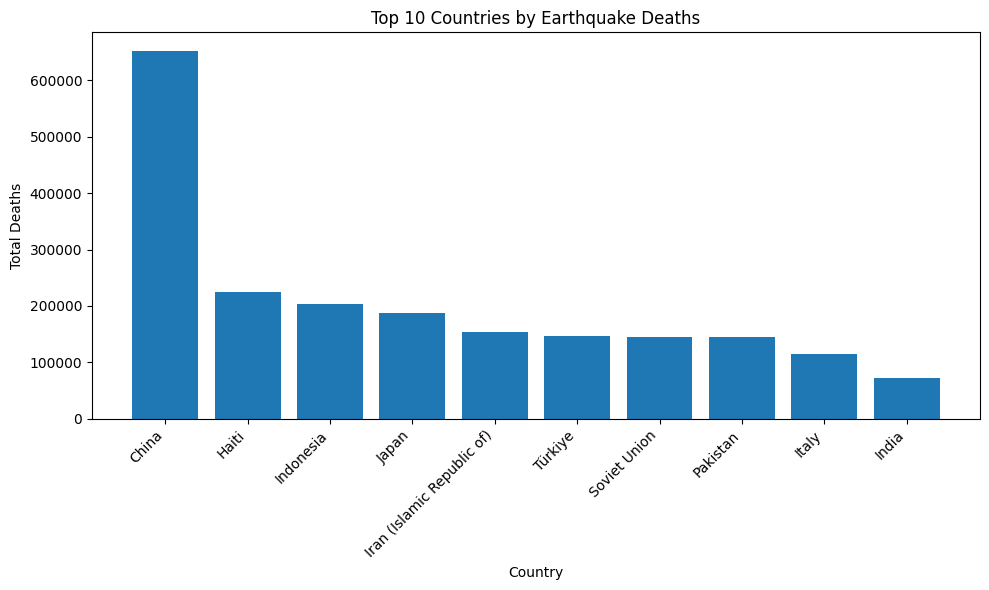

Country
China                         652707.0
Haiti                         225170.0
Indonesia                     203631.0
Japan                         188415.0
Iran (Islamic Republic of)    154281.0
Türkiye                       147022.0
Soviet Union                  144384.0
Pakistan                      144167.0
Italy                         115610.0
India                          71618.0
Name: Total Deaths, dtype: float64

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 読み込み（ファイル名は自分の環境に合わせて変更）
df = pd.read_csv("emdat.csv")

# 地震データだけを抽出
quake = df[df["Disaster Type"] == "Earthquake"]

# 国ごとの死者数を集計
country_deaths = quake.groupby("Country")["Total Deaths"].sum().sort_values(ascending=False)

# 上位10か国
top10 = country_deaths.head(10)

# 棒グラフ
plt.figure(figsize=(10, 6))
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Countries by Earthquake Deaths")
plt.ylabel("Total Deaths")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

top10


考察

分析の結果、地震による死者数が最も多い国は中国であり、続いてハイチやインドなど、人口密度が高い国や巨大地震を経験した国が上位を占めた。一方、地震頻度の高い日本が上位に入らないのは、耐震基準、避難訓練、情報伝達など防災対策が高水準で整備されているためと考えられる。他国の被害規模から、継続的な備えの重要性を再認識した。

まとめ

本分析では、EM-DATの災害データから地震による死者数が多い国トップ10を可視化した。その結果、巨大地震の発生や人口集中が死者数増加の要因となることが確認された。一方、地震頻度の高い日本が上位に入らないことから、優れた防災技術や建築基準が被害を抑えていると考えられる。世界比較を通じて日本の防災レベルの高さを再認識するとともに、継続的な備えの重要性を実感した。